# Régression Polynomiale, courbes d'apprentissage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
import pandas as pd
np.random.seed(42)

**Question** Vous avez un ensemble d'entraînement disponible dans dans `data.csv`. Le charger dans un dataframe `df_train`.

In [2]:
df_train = pd.read_csv("data.csv")

**Question** Regarder les 5 premières lignes et afficher des statistiques descriptives,  tracer l'ensemble des points en mettant la variable à prédire `t` en ordonnée. Vous pouvez appeler `X` et `y` les objets contenant la description des données et la variable à prédire

In [3]:
print(df_train.head())

          x          t
0  0.140280   9.880310
1  0.903858  10.227492
2  0.535815  10.163115
3  0.358392   9.937107
4  0.024342   9.881466


In [4]:
print(df_train.describe)

<bound method NDFrame.describe of            x          t
0   0.140280   9.880310
1   0.903858  10.227492
2   0.535815  10.163115
3   0.358392   9.937107
4   0.024342   9.881466
5   0.024334   9.919412
6   0.003374   9.970300
7   0.750261  10.380997
8   0.361339   9.972572
9   0.501367  10.038556
10  0.000424  10.015358
11  0.940725  10.131504
12  0.692961  10.277815
13  0.045088   9.954180
14  0.033060   9.992900
15  0.033637   9.987020
16  0.092563   9.828923
17  0.275369   9.860195
18  0.186576   9.854611
19  0.084814   9.926452
20  0.374364   9.946019
21  0.019459   9.954414
22  0.085348   9.821868
23  0.134221   9.785764
24  0.208000   9.882480
25  0.616501  10.323746
26  0.039870   9.927470
27  0.264437   9.918335
28  0.350955   9.962223
29  0.002158   9.963461
30  0.369111   9.982104
31  0.029078  10.024541
32  0.004232   9.989870
33  0.900384  10.302636
34  0.932445  10.036709
35  0.653506  10.328110
36  0.092790   9.875048
37  0.009540   9.966603
38  0.468175  10.089461
39  0.

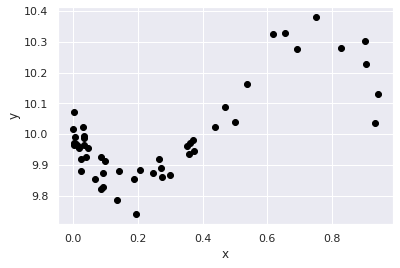

In [5]:
X = df_train["x"]
y = df_train["t"]
plt.scatter(X, y,color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Question** Découpez `X` et `y` en 2/3 et 1/3 pour créer des ensembles d'entraînement et de validation

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
print("x_train.shape: " + str(X_train.shape) + ", y_train.shape: " + str(y_train.shape))
print("x_test.shape: " + str(X_test.shape) + ", y_test.shape: " + str(y_test.shape))

x_train.shape: (33, 1), y_train.shape: (33, 1)
x_test.shape: (17, 1), y_test.shape: (17, 1)


**Question** Faire une régression lineaire sur ce jeu de données d'entraînement et estimer son score sur l'échantillon de validation. 

In [8]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

lr_pred = lr.predict(X_test)
# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, lr_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, lr_pred))

Coefficients: 
 [[0.35468433]]
Mean squared error: 0.01
Coefficient of determination: 0.39


In [11]:
print("score (?) :" + str(lr.score(X.values.reshape(-1,1) ,y.values.reshape(-1,1))))
print("score (?) :" + str(lr.score(y_test ,lr_pred)))

score (?) :0.5098868475002347
score (?) :-2139.5787582526477


**Question** Tracer dans un diagamme, les points en bleu pour les données d'apprentissage, en rouge pour les données de validation et en noir la droite de régression qui vient d'être calculée.

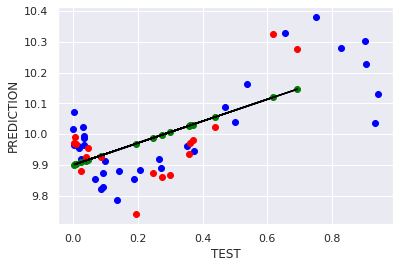

In [12]:
plt.scatter(X_train, y_train, color="blue")
plt.scatter(X_test, lr_pred, color="green")
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, lr_pred, color="black")
plt.xlabel('TEST')
plt.ylabel('PREDICTION')
plt.show()

## Ajouter des attributs, régression polynomiale

**Question** Dans les attributs décrivant les données, ajouter le carré de `X`. On doit avoir après cette manipulation `X2_train` et  `X2_valid` de dimensions (50,2)

In [13]:
X2_train = np.hstack((X_train, np.power(X_train,2)))
X2_test = np.hstack((X_test, np.power(X_test,2)))
print("X2_train:" + str(X2_train))
print("X2_test:" + str(X2_test)) 

X2_train:[[9.71637950e-02 9.44080305e-03]
 [2.70470747e-01 7.31544248e-02]
 [3.36372142e-02 1.13146218e-03]
 [5.01366775e-01 2.51368644e-01]
 [9.25633424e-02 8.56797236e-03]
 [2.07999831e-01 4.32639295e-02]
 [9.32445223e-01 8.69454094e-01]
 [2.90784768e-02 8.45557811e-04]
 [1.40280301e-01 1.96785627e-02]
 [6.69670789e-02 4.48458965e-03]
 [2.64437058e-01 6.99269575e-02]
 [9.00383763e-01 8.10690920e-01]
 [2.43342904e-02 5.92157688e-04]
 [2.15764084e-03 4.65541400e-06]
 [9.40725121e-01 8.84963754e-01]
 [9.27895484e-02 8.60990029e-03]
 [9.03857692e-01 8.16958728e-01]
 [1.94585372e-02 3.78634668e-04]
 [5.35815131e-01 2.87097854e-01]
 [8.26863594e-01 6.83703402e-01]
 [6.53506272e-01 4.27070448e-01]
 [1.34221000e-01 1.80152769e-02]
 [1.48933308e-02 2.21811301e-04]
 [4.23721405e-04 1.79539829e-07]
 [8.53484957e-02 7.28436571e-03]
 [1.86576499e-01 3.48107900e-02]
 [3.41711697e-02 1.16766884e-03]
 [3.74363965e-01 1.40148378e-01]
 [7.50261116e-01 5.62891741e-01]
 [1.18257038e-03 1.39847271e-06]
 

In [14]:
print("X2_train.shape:" + str(X2_train.shape))
print("X2_test.shape:" + str(X2_test.shape)) 

X2_train.shape:(33, 2)
X2_test.shape:(17, 2)


**Question** Réentraîner le classifieur linéaire avec cette nouvelle description des données (donc les attributs $x$ et $x^2$).

In [15]:
lr.fit(X2_train, y_train)

LinearRegression()

**Question** Tracer maintenant dans un diagamme, les points en bleu pour les données d'apprentissage, en rouge pour les données de test et en noir la courbe de régression qui vient d'être calculée.

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

lr_pred = lr.predict(X2_test)
# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, lr_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, lr_pred))

Coefficients: 
 [[0.13530956 0.24691501]]
Mean squared error: 0.01
Coefficient of determination: 0.47


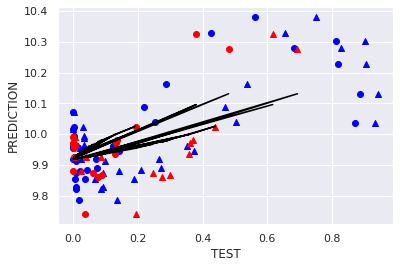

In [17]:
plt.scatter(X2_train[:,0], y_train, color="blue",  marker='^')
plt.scatter(X2_train[:,1], y_train, color="blue", marker='o')
plt.scatter(X2_test[:,0], y_test, color="red",  marker='^')
plt.scatter(X2_test[:,1], y_test, color="red", marker='o')

plt.plot(X2_test[:,1], lr_pred, color="black")
plt.plot(X2_test[:,0], lr_pred, color="black")

plt.xlabel('TEST')
plt.ylabel('PREDICTION')
plt.show()

**Question** Écrire maintenant une fonction `poly` qui prend en argument un jeu de données `X` et un degré `d` et qui calcule une nouvelle représentation avec tous les monômes entre 1 et `d`.

    # Exemple : 
    poly(X, 3)
    array([[1.40280301e-01, 1.96785627e-02, 2.76051470e-03],
       [9.03857692e-01, 8.16958728e-01, 7.38414431e-01],
       [5.35815131e-01, 2.87097854e-01, 1.53831374e-01],
       [3.58391981e-01, 1.28444812e-01, 4.60335905e-02],
       [2.43418162e-02, 5.92524014e-04, 1.44231106e-05],
       [2.43342904e-02, 5.92157688e-04, 1.44097371e-05], ...

In [18]:
def my_poly(X,nb):
    out = np.copy(X)
    out = out[:, np.newaxis]
    for i in range(1,nb):
        tmp = np.power(X,i+1)
        tmp = tmp[:, np.newaxis]
        out = np.hstack((out, tmp))
    return out

In [19]:
print(my_poly(df_train["x"], 3))

[[1.40280301e-01 1.96785627e-02 2.76051470e-03]
 [9.03857692e-01 8.16958728e-01 7.38414431e-01]
 [5.35815131e-01 2.87097854e-01 1.53831374e-01]
 [3.58391981e-01 1.28444812e-01 4.60335905e-02]
 [2.43418162e-02 5.92524014e-04 1.44231106e-05]
 [2.43342904e-02 5.92157688e-04 1.44097371e-05]
 [3.37370600e-03 1.13818922e-05 3.83991580e-08]
 [7.50261116e-01 5.62891741e-01 4.22315786e-01]
 [3.61339257e-01 1.30566059e-01 4.71786428e-02]
 [5.01366775e-01 2.51368644e-01 1.26027886e-01]
 [4.23721405e-04 1.79539829e-07 7.60748688e-11]
 [9.40725121e-01 8.84963754e-01 8.32507635e-01]
 [6.92960750e-01 4.80194601e-01 3.32756011e-01]
 [4.50878979e-02 2.03291854e-03 9.16600236e-05]
 [3.30603187e-02 1.09298467e-03 3.61344216e-05]
 [3.36372142e-02 1.13146218e-03 3.80592358e-05]
 [9.25633424e-02 8.56797236e-03 7.93080159e-04]
 [2.75369313e-01 7.58282583e-02 2.08807754e-02]
 [1.86576499e-01 3.48107900e-02 6.49487534e-03]
 [8.48144121e-02 7.19348450e-03 6.10111159e-04]
 [3.74363965e-01 1.40148378e-01 5.246650

**Question** Construire une liste avec tous les scores de la régression pour 20 représentations des données comprenant tous les monômes de 1 à 20 : (le $i^e$ résultat contient tous les monômes de 1 à $i$).

In [20]:
for i in range(1,21):
    x_train_d = my_poly(df_train["x"], i)
    tmp_x_train, tmp_x_test, tmp_y_train, tmp_y_test = train_test_split(x_train_d, y, test_size=0.33, random_state=42)
    lr.fit(tmp_x_train, tmp_y_train)
    
    lr_pred = lr.predict(tmp_x_test)

    print("i: " + str(i))
    # The mean squared error
    print('Mean squared error: %.2f'% mean_squared_error(tmp_y_test, lr_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f' % r2_score(tmp_y_test, lr_pred))
    

i: 1
Mean squared error: 0.01
Coefficient of determination: 0.39
i: 2
Mean squared error: 0.01
Coefficient of determination: 0.47
i: 3
Mean squared error: 0.00
Coefficient of determination: 0.91
i: 4
Mean squared error: 0.00
Coefficient of determination: 0.91
i: 5
Mean squared error: 0.00
Coefficient of determination: 0.88
i: 6
Mean squared error: 0.00
Coefficient of determination: 0.87
i: 7
Mean squared error: 0.00
Coefficient of determination: 0.87
i: 8
Mean squared error: 0.00
Coefficient of determination: 0.85
i: 9
Mean squared error: 0.00
Coefficient of determination: 0.85
i: 10
Mean squared error: 0.00
Coefficient of determination: 0.85
i: 11
Mean squared error: 0.00
Coefficient of determination: 0.85
i: 12
Mean squared error: 0.00
Coefficient of determination: 0.81
i: 13
Mean squared error: 0.00
Coefficient of determination: 0.79
i: 14
Mean squared error: 0.00
Coefficient of determination: 0.83
i: 15
Mean squared error: 0.00
Coefficient of determination: 0.78
i: 16
Mean squared 

**Question** Que constatez-vous. Pouvez-vous expliquer ce qui se produit ? Pourquoi les résultats se dégradent-ils quand la représentation des données est de plus en plus riche ?  

*Entrez votre réponse ici*

Les résultats se dégradent à cause de l'overfitting. Les données "collent trop bien" à l'échantillon de train. Les prédictions ne sont plus bonnes pour de nouvelles data !

On va refaire cela avec les outils de scikit-learn.

**Question** importez `PolynomialFeatures` de `sklearn.preprocessing`. Utilisez cela pour créer une représentation de X avec le degré 3. Cela donne quelque chose comme : 

     array([[1.00000000e+00, 1.73907352e-01, 3.02437672e-02, 5.25961348e-03],
       [1.00000000e+00, 5.18867376e-01, 2.69223354e-01, 1.39691215e-01],
       [1.00000000e+00, 1.30815988e-08, 1.71128228e-16, 2.23863083e-24],
       [1.00000000e+00, 9.14049845e-02, 8.35487119e-03, 7.63676871e-04],
       [1.00000000e+00, 2.15372915e-02, 4.63854925e-04, 9.99017872e-06], ...

In [21]:
from sklearn.preprocessing import PolynomialFeatures

trans = PolynomialFeatures(degree=3)
data = trans.fit_transform(df_train["x"].values.reshape(-1,1))
print(data.shape)
print(data)

(50, 4)
[[1.00000000e+00 1.40280301e-01 1.96785627e-02 2.76051470e-03]
 [1.00000000e+00 9.03857692e-01 8.16958728e-01 7.38414431e-01]
 [1.00000000e+00 5.35815131e-01 2.87097854e-01 1.53831374e-01]
 [1.00000000e+00 3.58391981e-01 1.28444812e-01 4.60335905e-02]
 [1.00000000e+00 2.43418162e-02 5.92524014e-04 1.44231106e-05]
 [1.00000000e+00 2.43342904e-02 5.92157688e-04 1.44097371e-05]
 [1.00000000e+00 3.37370600e-03 1.13818922e-05 3.83991580e-08]
 [1.00000000e+00 7.50261116e-01 5.62891741e-01 4.22315786e-01]
 [1.00000000e+00 3.61339257e-01 1.30566059e-01 4.71786428e-02]
 [1.00000000e+00 5.01366775e-01 2.51368644e-01 1.26027886e-01]
 [1.00000000e+00 4.23721405e-04 1.79539829e-07 7.60748688e-11]
 [1.00000000e+00 9.40725121e-01 8.84963754e-01 8.32507635e-01]
 [1.00000000e+00 6.92960750e-01 4.80194601e-01 3.32756011e-01]
 [1.00000000e+00 4.50878979e-02 2.03291854e-03 9.16600236e-05]
 [1.00000000e+00 3.30603187e-02 1.09298467e-03 3.61344216e-05]
 [1.00000000e+00 3.36372142e-02 1.13146218e-03 

*Aide* En python, on peut donner en argument un dictionnaire de paramètres 

In [22]:
dic = {'loc':5, 'scale':2}
print(np.random.normal(size=5, **dic))

def f(x, **kwargs):
    return [i>0 for i in np.random.normal(size=x, **kwargs)]

print(f(10))
print(f(10, loc=20))
print(f(10, loc=20, scale=100))
dic = {'loc':5, 'scale':2}
print(f(10,**dic))

[5.99342831 4.7234714  6.29537708 8.04605971 4.53169325]
[False, True, True, False, True, False, False, True, False, False]
[True, True, True, True, True, True, True, True, True, True]
[True, False, True, False, False, False, True, True, False, True]
[True, True, True, True, True, True, True, True, True, True]


**Question** Il existe une fonction `make_pipeline` dans `sklearn` qui permet d'enchaîner des opérations très simplement. Définissez une nouvelle fonction `ma_regression` qui prend en argument un degré et une liste d'autres arguments destinés à la fonction `LinearRegression` et compose un changement de représentation polynomial et une régression.

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def ma_reg(deg=2, **kwargs):
    return make_pipeline(PolynomialFeatures(deg), linear_model.LinearRegression(**kwargs))

ma_reg2 = make_pipeline(PolynomialFeatures(), linear_model.LinearRegression())

**Question**  Utilisez cette fonction pour estimer l'erreur d'une regression linéaire avec transformations polynomiales jusqu'au degré 3.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

model = ma_reg(3)
model.fit(X_train, y_train)

lr_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, lr_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, lr_pred))

print('score ?: %.2f' % model.score(y_test, lr_pred))
print('score ?: %.2f' % model.score(X.values.reshape(-1,1), y.values.reshape(-1,1)))

Mean squared error: 0.00
Coefficient of determination: 0.91
score ?: -1332354043.78
score ?: 0.91


## Courbe d'apprentissage en fonction du degré

**Question** En utilisant `validation_curve`, réaliser une validation croisée 5 fois sur `X_train` en appliquant tous les changements de représentation avec un degré entre 1 et `max_degree` que nous fixons à 15. Pour cela, regardez l'aide de `validation_curve` dans `sklearn.model_selection`. Utilisez bien-sûr `ma_regression`. Cela donne des scores de validation comme cela :

     [[ 0.49293082  0.66030384  0.65039394  0.69193837  0.6167657 ]
      [ 0.57202662  0.66235604  0.60475979  0.73104306  0.61910942]
      ...
      [ 0.87350381  0.93056784 -0.56590723  0.87945086  0.87330041]]

*Aide* : Dans les pipelines, on accède aux paramètres des éléments du pipeline avec la syntaxe `element__parametre`. Par défaut le nom de l'élément est le nom de la classe en minuscules.

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LinearRegression


param_range = np.arange(1,16)
print(param_range)
train_scores, valid_scores = validation_curve(ma_reg2, X_train, y_train,
                                          param_name='polynomialfeatures__degree', param_range=param_range, cv=5)

print("train_scores: " + str(train_scores))
print("valid_scores: " + str(valid_scores))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train_scores: [[0.62755579 0.5087338  0.39807495 0.57190597 0.59187583]
 [0.6471893  0.51254655 0.48327415 0.57624064 0.59930654]
 [0.94402127 0.92910925 0.84902934 0.90355685 0.8986088 ]
 [0.9440319  0.93093423 0.85920527 0.91246975 0.90276351]
 [0.94626181 0.93628381 0.90914652 0.91926843 0.91134717]
 [0.94754208 0.94228095 0.92203442 0.92122771 0.91217423]
 [0.94774875 0.94335464 0.92219829 0.92216302 0.91218302]
 [0.95758068 0.94812539 0.92640986 0.93003183 0.93392229]
 [0.95758557 0.94814054 0.93311956 0.93042704 0.93633428]
 [0.96010308 0.94817601 0.93623678 0.93100621 0.94890212]
 [0.96140186 0.94821634 0.93625532 0.93468681 0.95886119]
 [0.96271777 0.96370236 0.94269324 0.94397217 0.96152643]
 [0.96275936 0.96488538 0.94389215 0.95177246 0.9627896 ]
 [0.9701813  0.97170313 0.95466521 0.95824636 0.96281654]
 [0.97379785 0.97211963 0.95497903 0.96090941 0.97071353]]
valid_scores: [[-1.65261538e+00  7.12989742e-01  4.87117309e-01 -6.9

**Question** On peut donc ensuite tracer les courbes d'erreur d'entraînement et de validation. Puisqu'on a de la validation sur 5 parties, on obtient 5 résultats par degré. Pour la courbe on trace la valeur mediane (la moyenne sur 5 valeurs pouvant être plus fortement affectée par un très bon ou très mauvais résultat. Cela doit ressembler à cela. 

![validation et train](./validtrain.png)

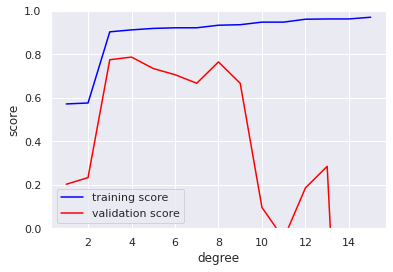

In [26]:
plt.plot(param_range, np.median(train_scores, 1), color='blue', label='training score')
plt.plot(param_range, np.median(valid_scores, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

**Question** Quelle est votre interprétation des résultats observés?

Je n'ai pas eu les mêmes résultats, mais ....
De façon générale, au plus on augmente le deg, au plus notre fonction va "coller" aux données (overfitting).
On remarque bien que la courbe de score décroit vers la fin.
=> On n'arrive plus à généraliser !

**Question** tracer maintenant la figure montrant la courbe estimée et les points dans l'échantillon de valid et de train. Pour cela, j'ai utilisé `linspace` pour obtenir 100 points espacés régulièrement de l'intervalle $[min(X),max(X)]$, j'ai calculé leur prédiction et utilisé `plot` pour tracer la courbe et `scatter` avec l'option `s` pour changer la taille des points. Par exemple pour le degré 3 cela donne cela, mais regardez pour plusieurs valeurs des degrés

![courbe finale](courbefinale.png)

## Courbe d'apprentissage en fonction de la taille de l'échantillon

Regardons maintenant la courbe d'apprentissage en fonction de la taille de l'échantillon. 

**Question** Lire le fichier `dataGrand.csv` et construire les matrices `X_g` (nd-array) et `y_g` (1d-array).

In [28]:
df_g = pd.read_csv("dataGrand.csv")
X_g = df_g["x"].values.reshape(-1,1)
y_g = df_g["t"].values.reshape(-1,1)
print(X_g.shape)
print(y_g.shape)

(200, 1)
(200, 1)


**Question** Utiliser maintenant `learning_curve` de la librairie `sklearn.model_selection`. En vous inspirant de l'exemple donné dans la [documentation](https://scikit-learn.org/stable/modules/learning_curve.html#validation-curve), calculez les résultats de l'apprentissage avec `ma_regression` pour les degrés $3, 5, 10, 15$ en prenant 10 tailles d'ensemble d'apprentissage entre 1% et 100% (avec `np.linspace(0.01, 1, 10)`)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

train_sizes_deg3, train_scores_deg3, valid_scores_deg3 = learning_curve(ma_reg(3), X_g.reshape(-1,1), y_g.reshape(-1,1), 
                                            train_sizes=np.linspace(0.01, 1, 10), 
                                            cv=5)

train_sizes_deg5, train_scores_deg5, valid_scores_deg5 = learning_curve(ma_reg(5), X_g, y_g, 
                                            train_sizes=np.linspace(0.01, 1, 10), 
                                            cv=5)

train_sizes_deg10, train_scores_deg10, valid_scores_deg10 = learning_curve(ma_reg(10), X_g, y_g, 
                                            train_sizes=np.linspace(0.01, 1, 10), 
                                            cv=5)

train_sizes_deg15, train_scores_deg15, valid_scores_deg15 = learning_curve(ma_reg(15), X_g, y_g, 
                                            train_sizes=np.linspace(0.01, 1, 10), 
                                            cv=5)

print("train_sizes_deg3: " + str(train_sizes_deg3))
print("train_scores_deg3: " + str(train_scores_deg3))
print("valid_scores_deg3: " + str(valid_scores_deg3))

print("train_sizes_deg15: " + str(train_sizes_deg15))
print("train_scores_deg15: " + str(train_scores_deg15))
print("valid_scores_deg15: " + str(valid_scores_deg15))

/opt/anaconda/lib/python3.8/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda/lib/python3.8/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda/lib/python3.8/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda/lib/python3.8/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda/lib/python3.8/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

train_sizes_deg3: [  1  19  36  54  72  89 107 124 142 160]
train_scores_deg3: [[       nan        nan        nan        nan        nan]
 [0.96098856 0.93096995 0.93096995 0.93096995 0.93096995]
 [0.97376236 0.90397419 0.90397419 0.90397419 0.90397419]
 [0.95300936 0.88927982 0.88737022 0.88737022 0.88737022]
 [0.94721369 0.89972561 0.9088302  0.9088302  0.9088302 ]
 [0.94458053 0.90589817 0.91471634 0.9174333  0.9174333 ]
 [0.93524353 0.90474738 0.91170983 0.91457852 0.91457852]
 [0.9364398  0.91250755 0.91767939 0.92288715 0.92135494]
 [0.9295461  0.90730911 0.91289314 0.91604542 0.91802072]
 [0.92226194 0.90259502 0.90755982 0.91023057 0.919539  ]]
valid_scores_deg3: [[-0.40272155 -2.48883423 -3.57647538 -1.5998579  -3.2531253 ]
 [ 0.83398705  0.90951413  0.85854126  0.7699033   0.79154497]
 [ 0.84571231  0.9371351   0.92776258  0.89775271  0.87078125]
 [ 0.85878178  0.94552993  0.93771729  0.91088815  0.87748547]
 [ 0.86351982  0.94227428  0.93686253  0.91226263  0.87756941]
 [ 0.8

/opt/anaconda/lib/python3.8/site-packages/sklearn/metrics/_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


**Question** Tracer les 4 courbes qui doivent ressemble à ce qui est ci-dessous et analysez les résultats. Qu'en concluez-vous ? 

![learning curve](learningCurve.png)

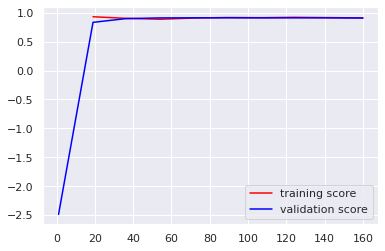

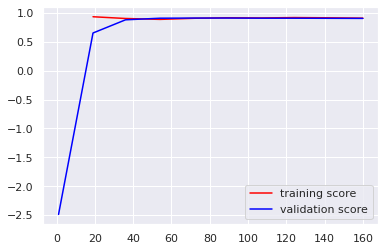

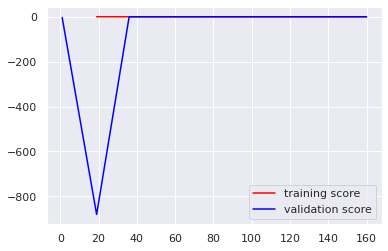

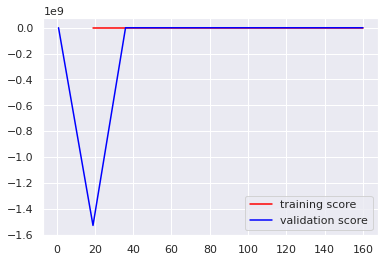

In [33]:
fig_3, ax3 = plt.subplots()
ax3.plot(train_sizes_deg3, np.median(train_scores_deg3, 1), color='red', label='training score')
ax3.plot(train_sizes_deg3, np.median(valid_scores_deg3, 1), color='blue', label='validation score')
ax3.legend(loc='best')

fig_5, ax5 = plt.subplots()
ax5.plot(train_sizes_deg5, np.median(train_scores_deg5, 1), color='red', label='training score')
ax5.plot(train_sizes_deg5, np.median(valid_scores_deg5, 1), color='blue', label='validation score')
ax5.legend(loc='best')

fig_10, ax10 = plt.subplots()
ax10.plot(train_sizes_deg10, np.median(train_scores_deg10, 1), color='red', label='training score')
ax10.plot(train_sizes_deg10, np.median(valid_scores_deg10, 1), color='blue', label='validation score')
ax10.legend(loc='best')

fig_15, ax15 = plt.subplots()
ax15.plot(train_sizes_deg15, np.median(train_scores_deg15, 1), color='red', label='training score')
ax15.plot(train_sizes_deg15, np.median(valid_scores_deg15, 1), color='blue', label='validation score')
ax15.legend(loc='best')

## Grid search

Ici, on va faire de la recherche d'hyperparamètres en examinant de nombreuses valeurs pour plusieurs paramètres : on construit une grille de plusieurs valeurs possible. On fait ce qu'on appelle du *grid search* qui est en général assez coûteux...

**Question** Charger les données de `dataPlusGrand.csv` dans `X_pg` et `y_pg`

In [155]:
df_pg = pd.read_csv("dataPlusGrand.csv")
X_pg = df_g["x"].values.reshape(-1,1)
y_pg = df_g["t"].values.reshape(-1,1)
print(X_pg.shape)
print(y_pg.shape)

X_pg_train, X_pg_test, y_pg_train, y_pg_test = train_test_split(X_pg, y_pg, test_size=0.33, random_state=42)
X_pg_train = X_pg_train.reshape(-1,1)
y_pg_train = y_pg_train.reshape(-1,1)
X_pg_test = X_pg_test.reshape(-1,1)
y_pg_test = y_pg_test.reshape(-1,1)

(200, 1)
(200, 1)


**Question** faire un pipeline avec une transformation polynomiale des attributs et un estimateur de la classe `Ridge`

In [156]:
def my_ridge(deg=2, **kwargs):
    return make_pipeline(PolynomialFeatures(deg), linear_model.Ridge(**kwargs))

**Question** Regarder l'aide sur `GridSearchCV`. Composer une grille de recherche en examinant tous les degres entre 1 et 15 et pour les valeurs de alpha dans l'ensemble `[1e-3, 1e-2, 1e-1, 1]`

In [159]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(1,16),
              'ridge__alpha': [1e-3, 1e-2, 1e-1, 1]}

grid = GridSearchCV(my_ridge(), param_grid, cv=5)
grid.fit(X_pg_train, y_pg_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'ridge__alpha': [0.001, 0.01, 0.1, 1]})

**Question** Quels sont les meilleurs paramètres ? Quel est le score du meilleur modèle sur `X_pg`, `y_pg` ?

In [160]:
grid.best_params_

{'polynomialfeatures__degree': 3, 'ridge__alpha': 0.001}